<a href="https://colab.research.google.com/github/syamkakarla98/Face_Recognition_Using_Convolutional_Neural_Networks/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on the Dataset

## Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Changing Directory

In [2]:
# Set your currebt working ditectory
%cd 'drive/My Drive/Project11'

/content/drive/My Drive/Project11


## Importing Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Reading Dataset

In [0]:
df = pd.read_csv('Dataset.csv', index_col=0)

In [5]:
df.head()

,pix-1,pix-2,pix-3,pix-4,pix-5,pix-6,pix-7,pix-8,pix-9,pix-10,pix-11,pix-12,pix-13,pix-14,pix-15,pix-16,pix-17,pix-18,pix-19,pix-20,pix-21,pix-22,pix-23,pix-24,pix-25,pix-26,pix-27,pix-28,pix-29,pix-30,pix-31,pix-32,pix-33,pix-34,pix-35,pix-36,pix-37,pix-38,pix-39,pix-40,...,pix-9962,pix-9963,pix-9964,pix-9965,pix-9966,pix-9967,pix-9968,pix-9969,pix-9970,pix-9971,pix-9972,pix-9973,pix-9974,pix-9975,pix-9976,pix-9977,pix-9978,pix-9979,pix-9980,pix-9981,pix-9982,pix-9983,pix-9984,pix-9985,pix-9986,pix-9987,pix-9988,pix-9989,pix-9990,pix-9991,pix-9992,pix-9993,pix-9994,pix-9995,pix-9996,pix-9997,pix-9998,pix-9999,pix-10000,class
0,24,20,21,20,20,23,19,14,12,10,9,8,8,7,6,6,6,5,6,7,7,5,4,4,4,3,3,4,5,5,4,3,4,3,3,3,3,2,3,4,...,11,12,13,14,17,21,23,25,28,35,40,43,47,48,50,50,49,47,39,24,11,2,0,0,0,1,4,6,10,35,42,15,15,13,14,23,110,161,160,1
1,24,20,21,20,20,23,19,14,12,10,9,8,8,7,6,6,6,5,6,7,7,5,4,4,4,3,3,4,5,5,4,3,4,3,3,3,3,2,3,4,...,11,12,13,14,17,21,23,25,28,35,40,43,47,48,50,50,49,47,39,24,11,2,0,0,0,1,4,6,10,35,42,15,15,13,14,23,110,161,160,1
2,217,183,150,150,119,135,125,123,121,102,90,82,78,72,73,71,72,71,69,67,66,67,67,62,65,60,60,61,60,60,59,65,62,61,61,61,60,61,68,75,...,109,113,114,117,116,117,111,101,86,78,66,52,39,34,48,63,55,42,47,69,104,77,69,69,67,82,113,191,200,200,198,199,198,199,198,196,196,196,197,1
3,217,183,150,150,119,135,125,123,121,102,90,82,78,72,73,71,72,71,69,67,66,67,67,62,65,60,60,61,60,60,59,65,62,61,61,61,60,61,68,75,...,109,113,114,117,116,117,111,101,86,78,66,52,39,34,48,63,55,42,47,69,104,77,69,69,67,82,113,191,200,200,198,199,198,199,198,196,196,196,197,1
4,70,66,59,52,49,49,50,50,51,52,53,53,53,54,54,53,51,51,52,51,48,46,47,49,47,48,48,49,53,52,50,49,50,49,48,48,47,47,47,46,...,111,114,115,117,118,119,122,126,126,125,125,126,126,127,128,129,129,130,130,131,132,132,132,133,133,134,137,138,139,138,139,141,142,142,144,145,147,149,150,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10029 entries, 0 to 10028
Columns: 10001 entries, pix-1 to class
dtypes: int64(10001)
memory usage: 765.3 MB


## Statistics of the Dataset

In [7]:
#iloc - index location
df.iloc[:, 100*100].describe()  

count    10029.000000
mean         2.501446
std          1.116795
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: class, dtype: float64

In [8]:
print('Class Labels: ',df.loc[:, 'class'].unique().tolist())

Class Labels:  [1, 2, 4, 3]


In [9]:
print('class_label Count ')
x = df.loc[:,'class'].value_counts()
x

class_label Count 


3    2529
4    2500
2    2500
1    2500
Name: class, dtype: int64

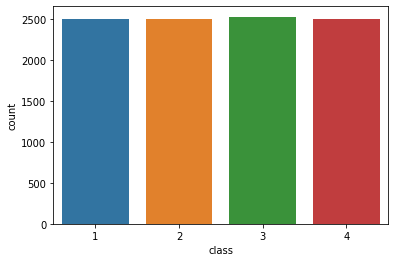

In [10]:
sns.countplot(x="class", data=df);

In [0]:
X = df.iloc[:, :100*100].values
y = df.loc[:,'class']

In [12]:
X.shape, y.shape

((10029, 10000), (10029,))

## Viewing Dataset in Dimensions

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
# Standardizing the features
# Mean =0 & Variance =1
x = StandardScaler().fit_transform(X)

In [0]:

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [f'PC{i}' for i in range(1, 1+3)])

finalDf = pd.concat([principalDf, df[['class']]], axis=1)

In [0]:
# save the data 
finalDf.to_csv('Dataset_In_3D.csv', index=False)

In [17]:
finalDf.head()

,PC1,PC2,PC3,class
0,-74.853071,-15.933911,-18.758134,1
1,-74.853071,-15.933911,-18.758134,1
2,14.604114,35.093615,-21.923620,1
3,14.604114,35.093615,-21.923620,1
4,-13.260838,-2.254183,-7.323114,1


In [18]:
import plotly.express as px

fig = px.scatter_3d(finalDf, x='PC1', y='PC2', z='PC3',
              color='class', size='class', size_max=18,
              symbol='class', opacity=0.7, width=1200
              , height=800)

# tight layout
fig.update_layout(paper_bgcolor='rgb(229,236,246)',
    margin=dict(l=0, r=0, b=0, t=0), coloraxis_showscale=False, scene = dict( xaxis = dict(tickvals= []),yaxis = dict(tickvals= []),  zaxis = dict(tickvals= [])),
        title={
        'text': "",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})



In [0]:
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components=3, kernel="rbf", fit_inverse_transform=True, gamma=10)
# X_kpca = kpca.fit_transform(x)

In [0]:
# res = pd.concat([pd.DataFrame(data = X_kpca
#              , columns = [f'principal component {i}' for i in range(1, 1+3)]), df[['class']]], axis=1)
# res.to_csv('Dataset_In_3D_using_KPCA(rbf).csv', index=False)

In [0]:

# fig = px.scatter_3d(res, x='principal component 1', y='principal component 2', z='principal component 3',
#               color='class', size='class', size_max=18,
#               symbol='class', opacity=0.7)

# # tight layout
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), title={
#         'text': "3-Dimensional View using Kernel-PCA",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'})

In [0]:
# # Using t-SNE
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
# tsneDf = tsne.fit_transform(x)

In [0]:
def plot_random_img(r=5 ,c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(r+5, c+8))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      n = np.random.randint(100*100)
      img = df.iloc[n, : 100*100].values.reshape(100, 100)
      fig.add_subplot(rows, columns, i)
      plt.imshow(img,cmap='gray')
      plt.title(f'Class-{df.iloc[n, -1]}')
      plt.axis('off')
  plt.show()

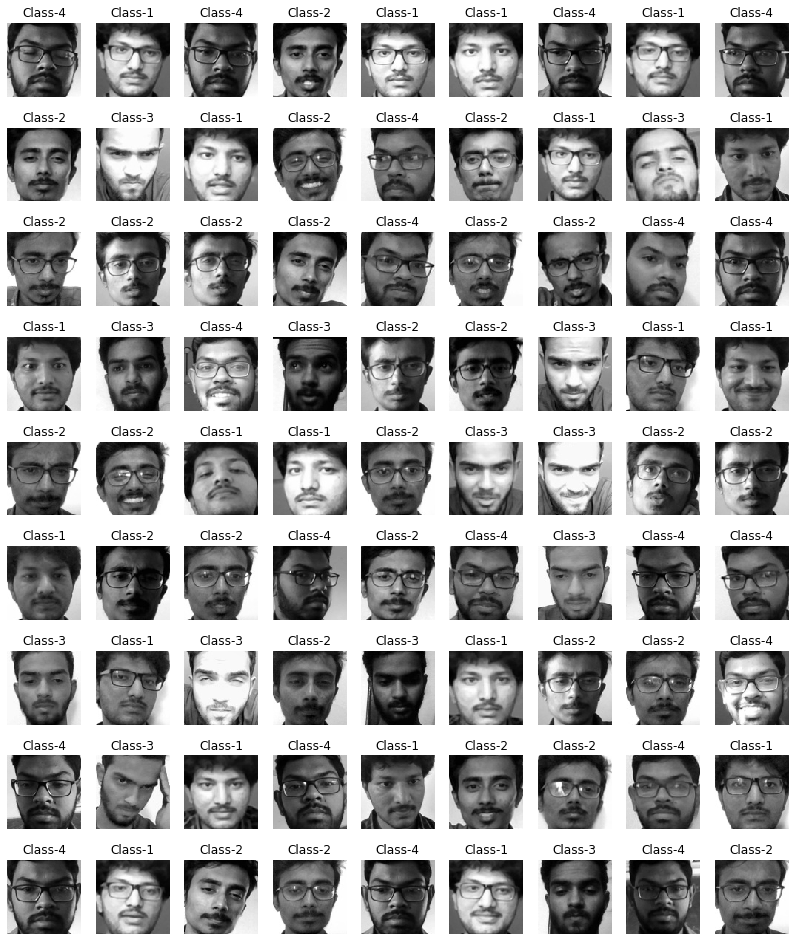

In [26]:
plot_random_img(9, 9)

In [0]:
## Eigen Faces

In [0]:
no_of_eigenFaces = 18
eig = PCA(n_components = no_of_eigenFaces)
egf = eig.fit_transform( x.T )

In [29]:
egf.shape

(10000, 18)

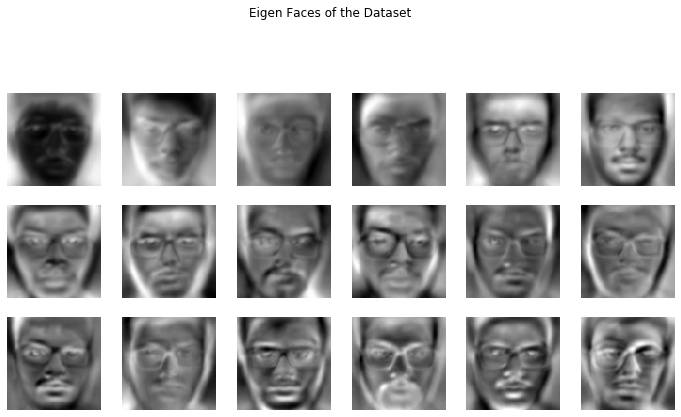

In [31]:

r, c = 6, 6
fig=plt.figure(figsize=(12, 12), )
fig.suptitle('Eigen Faces of the Dataset')
for i in range(1, egf.shape[1] +1):
  fig.add_subplot(r, c, i)
  plt.imshow(egf[:, i-1].reshape(100, 100), cmap='gray')
  plt.axis('off')



---



---

